In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('dataframes/df_input_to_classifier.pkl')

In [3]:
print('Dane wejściowe: \n', df.head())

features = ['alg3', 'alg5']
# features = ['alg1', 'alg3', 'alg4', 'alg5']

X = df[features]

X = X.astype(int)
y = df['annotations']

unique_annotations = set(y)
print(unique_annotations)

y = y.replace(['N', 'A'], 'N+A')

# y = y.replace(unique_annotations - {'N+A', 'V', 'L', 'R', '/'}, 'Other')
y = y.replace(unique_annotations - {'N+A', 'V'}, 'Other')


Dane wejściowe: 
   alg1 alg3 alg4 alg5 annotations
0    2    3   30   41           N
1    2    3   13   40           N
2    2    4   31   42           N
3    2    4   14   41           N
4    3    4    1   41           N
{'/', 'V', '|', 'x', 'S', 'a', 'e', '~', '!', 'J', 'FP', '+', 'f', 'j', 'A', 'AMB', ']', 'N', 'Q', 'E', 'L', 'F', 'R'}


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn import tree

dtree = tree.DecisionTreeClassifier(max_depth=10)


classifier: DecisionTreeClassifier(max_depth=10)
Accuracy (train): 0.8635011367327055
Accuracy (test): 0.8614428614731737


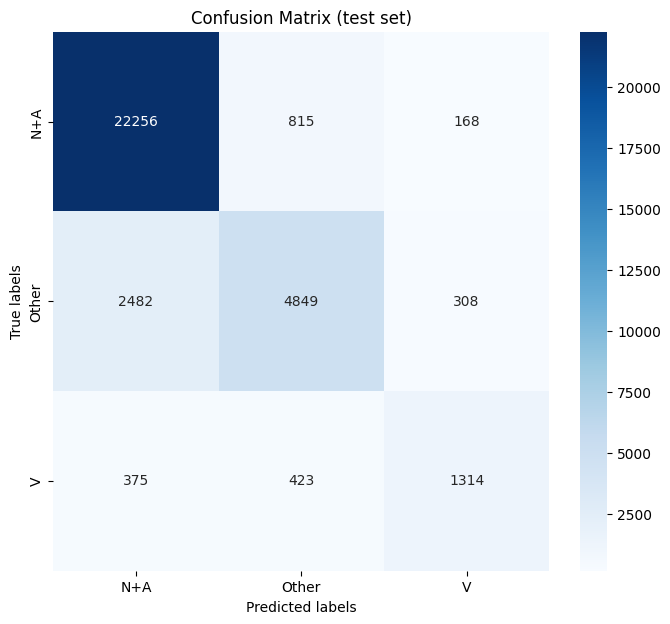

In [6]:
labels = np.unique(y)

clf = dtree

clf.fit(X_train, y_train) 

y_train_pred = clf.predict(X_train) # predykcja klas-zbiór terningowy
y_test_pred = clf.predict(X_test) # predykcja klas - zbiór testowy
y_all_pred = clf.predict(X)

print(f'classifier: {clf}')
print('Accuracy (train):', accuracy_score(y_train, y_train_pred))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_all = confusion_matrix(y, y_all_pred)

# Plot confusion matrix
fig = plt.figure(figsize=(8,7))

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (test set)')
# plt.savefig('Images/Confusion Matrix (test set) with A')

plt.tight_layout
plt.show()


In [7]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         N+A       0.89      0.96      0.92     23239
       Other       0.80      0.63      0.71      7639
           V       0.73      0.62      0.67      2112

    accuracy                           0.86     32990
   macro avg       0.81      0.74      0.77     32990
weighted avg       0.86      0.86      0.86     32990



In [8]:
# plt.figure(figsize=(12, 8))
# tree.plot_tree(clf, filled=True, feature_names=features, class_names=labels)
# feature_names=iris.feature_names, class_names=iris.target_names
# plt.show()